# 네이버 영화 리뷰 감정분석(정규화 없이 작업)


# 1.데이터 다운 및 사전 import 패키지

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer,text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding


#전처리


urllib.request.urlretrieve("https://raw.githubusercontent.com/Ijjoe/k-digital_alpaedu_pythonStudy/main/csv/ratings_test.txt", filename="ratings_test.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/Ijjoe/k-digital_alpaedu_pythonStudy/main/csv/ratings_train.txt", filename="ratings_train.txt")

#data=pd.read_csv('/content/ratings.txt',delimiter='\t', encoding='UTF-8-sig')
train_text=pd.read_csv('/content/ratings_train.txt',delimiter='\t', encoding='UTF-8-sig')
test_text=pd.read_csv('/content/ratings_test.txt',delimiter='\t', encoding='UTF-8-sig')


del train_text['id']
del test_text['id']

# 텍스트가 총 길이
print('Lentext: {} '.format(len(train_text)))  #(150000, 1)
print(('Lentext: {} '.format(len(test_text))))  #(50000, 1)
#print(train_text['document'])

#학습울위한 정답 데이터
y_train = np.array([[i] for i in train_text['label']])
y_test = np.array([[i] for i in test_text['label']])

#X.to_list()  # 줄력을 위해 타입 변이 -> list

print(y_train.shape, y_test.shape)

#Numpy를 이용하여 분리하기

print(y_train[:5])




Lentext: 150000 
Lentext: 50000 
(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [8]:
train_text[train_text['document'].isna()]  #결측치 확인

#document 결측값때문에 에러가 발생 fillna로 보정


X_train= [i.split(' ') for i in train_text['document'].fillna(value="")]

ck=[]
for i in range(40):
    ck.append(len(X_train[i]))
    if len(X_train[i]) <=25:
        print(len(X_train[i]),X_train[i])

print(max(ck))

5 ['아', '더빙..', '진짜', '짜증나네요', '목소리']
4 ['흠...포스터보고', '초딩영화줄....오버연기조차', '가볍지', '않구나']
1 ['너무재밓었다그래서보는것을추천한다']
6 ['교도소', '이야기구먼', '..솔직히', '재미는', '없다..평점', '조정']
11 ['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화!스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']
8 ['막', '걸음마', '뗀', '3세부터', '초등학교', '1학년생인', '8살용영화.ㅋㅋㅋ...별반개도', '아까움.']
4 ['원작의', '긴장감을', '제대로', '살려내지못했다.']
13 ['별', '반개도', '아깝다', '욕나온다', '이응경', '길용우', '연기생활이몇년인지..정말', '발로해도', '그것보단', '낫겟다', '납치.감금만반복반복..이드라마는', '가족도없다', '연기못하는사람만모엿네']
6 ['액션이', '없는데도', '재미', '있는', '몇안되는', '영화']
10 ['왜케', '평점이', '낮은건데?', '꽤', '볼만한데..', '헐리우드식', '화려함에만', '너무', '길들여져', '있나?']
1 ['걍인피니트가짱이다.진짜짱이다♥']
6 ['볼때마다', '눈물나서', '죽겠다90년대의', '향수자극!!허진호는', '감성절제멜로의', '달인이다~']
8 ['울면서', '손들고', '횡단보도', '건널때', '뛰쳐나올뻔', '이범수', '연기', '드럽게못해']
11 ['담백하고', '깔끔해서', '좋다.', '신문기사로만', '보다', '보면', '자꾸', '잊어버린다.', '그들도', '사람이었다는', '것을.']
14 ['취향은', '존중한다지만', '진짜', '내생에', '극장에서', '본', '영화중', '가장', '노잼', '노감동임', '스토리도', '어거지고', '감동도', '어거지']
4 ['ㄱ냥', '매번', '긴장되고', '재밋음ㅠㅠ']

In [9]:
word_len = [len(sent) for sent in X_train]
word_len.sort()
print(word_len[0:40])




[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


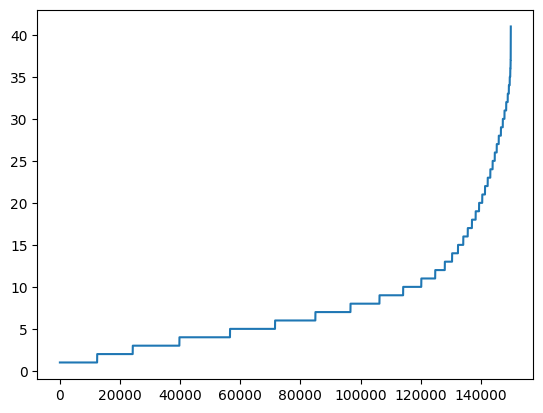

141404


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams # 한글 환경 설정을 위한 rcParams 임포트
import warnings
# 경고창 무시
warnings.filterwarnings('ignore')

# 학습데이터 개별 리스트 길이 파악을 위해 그래프 검증
# 범위 설정 그래프가 단어갯수 파악에 직관적이지 않아보임
word_len = [len(sent) for sent in X_train]
word_len.sort() # 갯수 정렬
plt.plot(word_len) #
plt.show()


naverReview=pd.DataFrame(data=word_len,columns=['count'])
naverReview.groupby('count').size()

print(sum([int(numb<=21) for numb in word_len]))



In [ ]:
splitword=[]
for i in X_train:
    splitword.append([j[:5]for j in i][:22])

for i in range(5):
    print(splitword[i])  # 전처리중 특수문자 및 정규화 작업 없이 추출해 처리 후 데이터와 비교 예정

['아', '더빙..', '진짜', '짜증나네요', '목소리']
['흠...포', '초딩영화줄', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '..솔직히', '재미는', '없다..평', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화!스파', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1500)  # num_words의 어휘제한이 토크나이저에서 실행 됨으로 위 과정 없어도됨 단! 제한단위 수치를 가늠하기 애매함
tokenizer.fit_on_texts(splitword)
train_X = tokenizer.texts_to_sequences(splitword)
train_X = pad_sequences(train_X, padding='post')

print(train_X[0].size)
print(train_X[0])


20
[  47    4 1088    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]


In [ ]:
for idx, j in enumerate(range(1,23), 1):
  print(idx, tokenizer.index_word[j])

1 영화
2 너무
3 정말
4 진짜
5 이
6 영화.
7 왜
8 이런
9 그냥
10 더
11 수
12 영화를
13 잘
14 다
15 보고
16 영화가
17 영화는
18 좀
19 그
20 본
21 최고의
22 ㅋㅋ


In [ ]:
import tensorflow as tf
print(tf.__version__)


model = tf.keras.Sequential([
  tf.keras.layers.Embedding(20000, 300, input_length=20),
  tf.keras.layers.LSTM(units=50),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

2.15.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 300)           6000000   
                                                                 
 lstm (LSTM)                 (None, 50)                70200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 6070302 (23.16 MB)
Trainable params: 6070302 (23.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

train_X.shape , y_train.shape

his=model.fit(train_X,y_train,epochs=10, batch_size=128,validation_split=0.2)

Epoch 1/10
938/938 [==============================] - 137s 143ms/step - loss: 0.5358 - accuracy: 0.6968 - val_loss: 0.5023 - val_accuracy: 0.7240
Epoch 2/10
938/938 [==============================] - 127s 136ms/step - loss: 0.5037 - accuracy: 0.7192 - val_loss: 0.4990 - val_accuracy: 0.7271
Epoch 3/10
938/938 [==============================] - 123s 131ms/step - loss: 0.4953 - accuracy: 0.7228 - val_loss: 0.5019 - val_accuracy: 0.7286
Epoch 4/10
938/938 [==============================] - 135s 144ms/step - loss: 0.4887 - accuracy: 0.7272 - val_loss: 0.5048 - val_accuracy: 0.7189
Epoch 5/10
938/938 [==============================] - 134s 143ms/step - loss: 0.4832 - accuracy: 0.7301 - val_loss: 0.5042 - val_accuracy: 0.7280
Epoch 6/10
938/938 [==============================] - 125s 134ms/step - loss: 0.4768 - accuracy: 0.7332 - val_loss: 0.5024 - val_accuracy: 0.7248
Epoch 7/10
938/938 [==============================] - 126s 134ms/step - loss: 0.4711 - accuracy: 0.7356 - val_loss: 0.5099 -

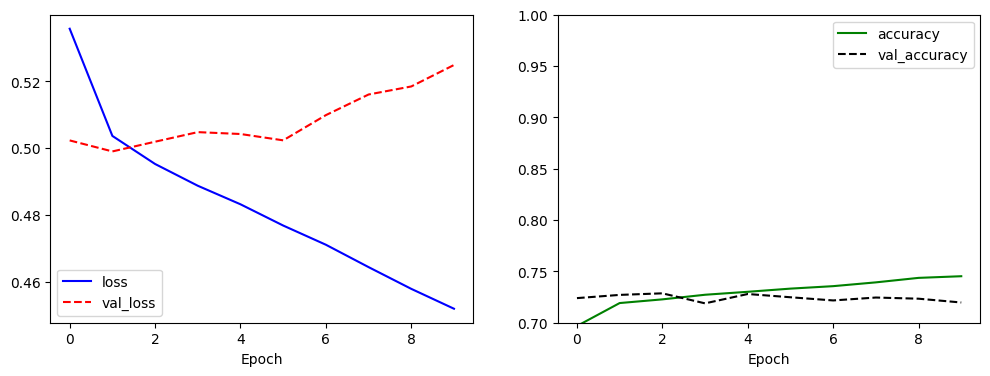

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(his.history['loss'], 'b-', label='loss')
plt.plot(his.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(his.history['accuracy'], 'g-', label='accuracy')
plt.plot(his.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
# 학습 결과 테스트 코드

test_text[test_text['document'].isna()]  #결측치 확인

#document 결측값때문에 에러가 발생 fillna로 보정


test_X= [i.split(' ') for i in test_text['document'].fillna(value="")]

ck=[]
for i in range(10):
    ck.append(len(test_X[i]))
    if len(test_X[i]) <=22:
        #print(len(test_X[i]),test_X[i])
        pass


splitword_test=[]
for i in test_X:
    splitword_test.append([j[:5]for j in i][:22])
'''
for i in range(5):
    print(splitword_test[i])  # 전처리중 특수문자 및 정규화 작업 없이 추출해 처리 후 데이터와 비교 예정
'''


X_test = tokenizer.texts_to_sequences(splitword_test)
X_test = pad_sequences(X_test, padding='post')

print(X_test[2].size)
print(X_test[2])
print(type(X_test))
print(type(y_test))

model.evaluate(X_test, y_test, verbose=0)

18
[ 592    5 1004   78    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


[0.5377479791641235, 0.7110400199890137]

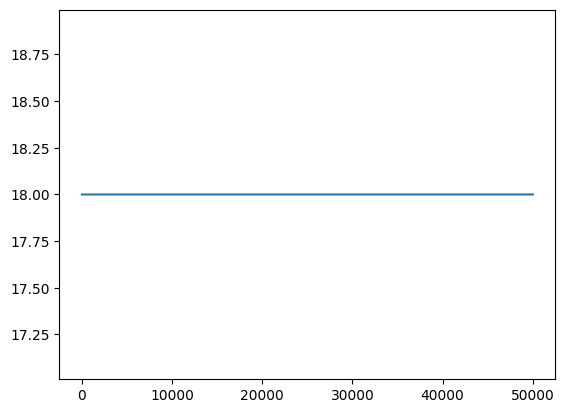

In [ ]:
word_len = [len(sent) for sent in X_test]
word_len.sort() # 갯수 정렬
plt.plot(word_len) #
plt.show()


In [78]:
# 감정분석 테스트

emtion = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
emtion = emtion.split(' ')

arr=[]
test_emtion=[]
for word in emtion:
    arr.append(word)
    test_emtion.append(arr[:])

text_e = tokenizer.texts_to_sequences(test_emtion)
text_e = pad_sequences(text_e,padding='post', maxlen=20)
pred = model.predict(text_e)
for idx,v in enumerate(test_emtion):
    print(v)
    print(pred[idx])

1/1 [==============================] - 0s 41ms/step
['완전']
[0.38137522 0.6186248 ]
['완전', '재미']
[0.5484092  0.45159078]
['완전', '재미', '있었다']
[0.5484092  0.45159078]


In [ ]:
from keras.preprocessing.text import Tokenizer

# 샘플 데이터
texts = ["The cat sat on the mat.", "The dog sat on the log."]

# num_words를 설정하여 Tokenizer 인스턴스 생성
tokenizer = Tokenizer(num_words=2000)

# 텍스트에 대한 토큰화 수행
tokenizer.fit_on_texts(texts)

# 시퀀스로 변환
sequences = tokenizer.texts_to_sequences(texts)

# 결과 출력
print("Tokenized sequences:", sequences)


Tokenized sequences: [[1, 4, 2, 3, 1, 5], [1, 6, 2, 3, 1, 7]]


# 네이버 영화 리뷰 감정분석 (텍스트 정규화 및 분석기 중복 사용 가설 검증)

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer,text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding

#urllib.request.urlretrieve("https://raw.githubusercontent.com/Ijjoe/k-digital_alpaedu_pythonStudy/main/csv/ratings_test.txt", filename="ratings_test.txt")
#urllib.request.urlretrieve("https://raw.githubusercontent.com/Ijjoe/k-digital_alpaedu_pythonStudy/main/csv/ratings_train.txt", filename="ratings_train.txt")

train_text=pd.read_table('/content/ratings_train.txt')
test_text=pd.read_table('/content/ratings_train.txt')



In [3]:
!pip install konlpy
!pip install soynlp
from konlpy.tag import Komoran
kom = Komoran()

train_text[train_text['document'].isna()]  #결측치 확인
#train_text[train_text['label'].isna()]  #결측치 확인




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 39.5 MB/s eta 0:00:00


,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [4]:

train_text = train_text.dropna(subset=['document'])

print(train_text['document'].shape)
train_text[train_text['document'].isna()]  #결측치 정리 확인

print(type(train_text['document']))

(149995,)
<class 'pandas.core.series.Series'>


### 가설 : 코모란으로 형태소 추출 후 -> 추출된 데이터를 okt로 재가공시 어떤 결과가 나오는가?

   - 검증 :  한개의 분석기 보다 못한 결과가 나옴
     <br/><br/>
   - 1개의 분석기 데이터 :
     <br/>[['아', '더빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '...', '포스터', '보고', '초딩', '영화', '줄', '....', '오버', '연기', '조차', '가볍', '지', '않', '구나'], [], ['교도소', '이야기', '이', '구먼', '..', '솔직히', '재미', '는', '없', '다', '.', '.', '평점', '조정'], ['사이몬페그의', '익살', '스럽', 'ㄴ', '연기', '가', '돋보이', '었', '던', '영화', '!', '스파이더맨', '에서', '늙', '어', '보이', '기', '만', '하', '았', '던', '커스틴 던스트', '가', '너무나', '도', '이뻐보였다']]
      <br/><br/>
   - 2개의 분석기 :
     <br/>[[], ['더빙'], [], [], ['진짜']]

In [ ]:
import re
from konlpy.tag import Okt

okt = Okt()


class hangul_tokenizing:
    '''
        arg : pd.Series
        return : list
    '''
    def __init__(self, series, count):
        self.series = series
        self.count = count
        self.my_list = []
        self.kom = Komoran()
        self.okt = Okt()
        self.words=[]

    def regExp(self,vv):
        ret =[]
        if not vv:
            return ""
        else:
            for v in vv:
                vvar=re.sub(r'[ㄱ-ㅎ]', '',v)
                vvar=re.sub(r'[^\w\s]', '',vvar)  #특수문자 제거
                #vvar = re.findall(r'\.+', vvar)
                #vvar=emoticon_normalize(vvar, num_repeats=2)
                ret.append(vvar)

            return ret

    def komoran_func(self):
        for i in range(self.count):
            try:
                print(f'{i} 번째 ==> {self.series[i]}')
                txt = str(self.series[i])

                morphs = self.kom.morphs(txt)
                nouns = self.kom.nouns(txt)
                if nouns:
                    ckword=self.regExp(morphs)

                    self.my_list.append(ckword)
                else:
                    ckword=self.regExp(nouns)
                    print(ckword)
                    self.my_list.append(ckword)
            except:
                pass


        self.words = [list(filter(lambda x: x != '', sublist)) for sublist in self.my_list]  #리스트에서
        word=[]
        for i in range(len(self.words)):
            word.append([x for x in self.words[i] if len(x) != 1])

        return word  # 리스트를 반환

    def okt_func(self):  # 검증을 위해 테스트로 만들어 둠 ( 쓰이지 않음)
        kom_okt = []
        for va in self.my_list:
            for okfor in va:
                morphs = self.okt.morphs(okfor)
                nouns = self.okt.nouns(okfor)
                if nouns:
                    kom_okt.append(morphs)
                else:
                    kom_okt.append(nouns)
        return kom_okt  # 변경된 리스트를 반환


# 사용 예
k1 = hangul_tokenizing(train_text['document'], len(train_text['document'])-1)
words = k1.komoran_func()
#k2=k1.okt_func()
print(words[:5])



In [31]:
word_len = [len(sent) for sent in words]
word_len.sort()
print(word_len[0:40])




[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


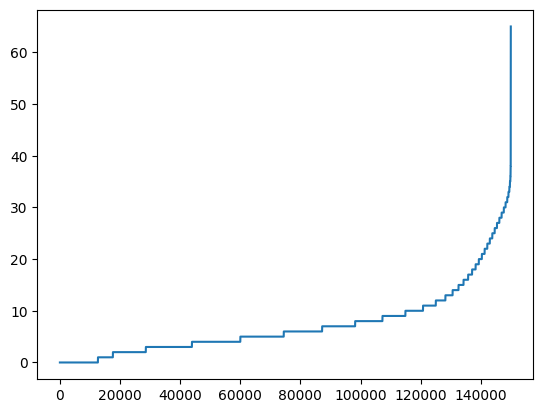

141267


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams # 한글 환경 설정을 위한 rcParams 임포트
import warnings
# 경고창 무시
warnings.filterwarnings('ignore')

# 학습데이터 개별 리스트 길이 파악을 위해 그래프 검증
# 범위 설정 그래프가 단어갯수 파악에 직관적이지 않아보임
word_len = [len(sent) for sent in words]
word_len.sort() # 갯수 정렬
plt.plot(word_len)
plt.show()


naverReview=pd.DataFrame(data=word_len,columns=['count'])
naverReview.groupby('count').size()

print(sum([int(numb<=21) for numb in word_len]))


In [33]:
splitword=[]
for i in words:
    splitword.append([j[:5]for j in i][:22])

for i in range(5):
    print(splitword[i])  # 전처리중 특수문자 및 정규화 작업 없이 추출해 처리 후 데이터와 비교 예정

['더빙', '진짜', '짜증', '네요', '목소리']
['포스터', '보고', '초딩', '영화', '오버', '연기', '조차', '가볍', '구나']
[]
['교도소', '이야기', '구먼', '솔직히', '재미', '평점', '조정']
['사이몬페그', '익살', '스럽', '연기', '돋보이', '영화', '스파이더맨', '에서', '보이', '커스틴 던', '너무나', '이뻐보였다']


In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1500)  # num_words의 어휘제한이 토크나이저에서 실행 됨으로 위 과정 없어도됨 단! 제한단위 수치를 가늠하기 애매함
tokenizer.fit_on_texts(splitword)

# 정규화를 모두 마친 words변수값 train_X의 변수 헷갈리지않게 주석
train_X = tokenizer.texts_to_sequences(splitword)
train_X = pad_sequences(train_X, padding='post')

print(train_X[0].size)
print(train_X[0])

22
[294   8 111  10 443   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]


In [35]:
for idx, j in enumerate(range(1,23), 1):
  print(idx, tokenizer.index_word[j])

1 영화
2 는데
3 너무
4 정말
5 으로
6 에서
7 지만
8 진짜
9 아니
10 네요
11 만들
12 재밌
13 아서
14 어요
15 연기
16 나오
17 최고
18 평점
19 니다
20 이런
21 스토리
22 생각


In [36]:
import tensorflow as tf
print(tf.__version__)


model = tf.keras.Sequential([
  tf.keras.layers.Embedding(20000, 300, input_length=22),
  tf.keras.layers.LSTM(units=50),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

2.15.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 22, 300)           6000000   
                                                                 
 lstm_1 (LSTM)               (None, 50)                70200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 6070302 (23.16 MB)
Trainable params: 6070302 (23.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:

#학습울위한 정답 데이터
y_train = np.array([[i] for i in train_text['label']])
y_test = np.array([[i] for i in test_text['label']])

train_X.shape , y_train.shape

his=model.fit(train_X,y_train,epochs=10, batch_size=128,validation_split=0.2)

Epoch 1/10
938/938 [==============================] - 148s 152ms/step - loss: 0.4800 - accuracy: 0.7477 - val_loss: 0.4563 - val_accuracy: 0.7700
Epoch 2/10
938/938 [==============================] - 136s 145ms/step - loss: 0.4426 - accuracy: 0.7698 - val_loss: 0.4438 - val_accuracy: 0.7704
Epoch 3/10
938/938 [==============================] - 138s 148ms/step - loss: 0.4291 - accuracy: 0.7790 - val_loss: 0.4413 - val_accuracy: 0.7752
Epoch 4/10
938/938 [==============================] - 139s 148ms/step - loss: 0.4170 - accuracy: 0.7851 - val_loss: 0.4403 - val_accuracy: 0.7765
Epoch 5/10
938/938 [==============================] - 133s 142ms/step - loss: 0.4060 - accuracy: 0.7916 - val_loss: 0.4454 - val_accuracy: 0.7723
Epoch 6/10
938/938 [==============================] - 139s 149ms/step - loss: 0.3946 - accuracy: 0.7973 - val_loss: 0.4488 - val_accuracy: 0.7741
Epoch 7/10
938/938 [==============================] - 144s 154ms/step - loss: 0.3836 - accuracy: 0.8023 - val_loss: 0.4566 -

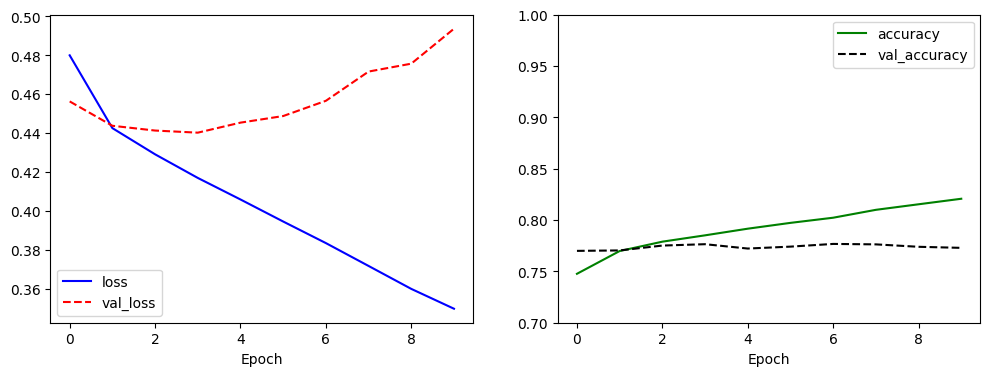

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(his.history['loss'], 'b-', label='loss')
plt.plot(his.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(his.history['accuracy'], 'g-', label='accuracy')
plt.plot(his.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [39]:
# 학습 결과 테스트 코드

test_text[test_text['document'].isna()]  #결측치 확인

#document 결측값때문에 에러가 발생 fillna로 보정


test_X= [i.split(' ') for i in test_text['document'].fillna(value="")]

ck=[]
for i in range(10):
    ck.append(len(test_X[i]))
    if len(test_X[i]) <=22:
        #print(len(test_X[i]),test_X[i])
        pass


splitword_test=[]
for i in test_X:
    splitword_test.append([j[:5]for j in i][:22])
'''
for i in range(5):
    print(splitword_test[i])  # 전처리중 특수문자 및 정규화 작업 없이 추출해 처리 후 데이터와 비교 예정
'''


X_test = tokenizer.texts_to_sequences(splitword_test)
X_test = pad_sequences(X_test, padding='post')

print(X_test[2].size)
print(X_test[2])
print(type(X_test))
print(type(y_test))

model.evaluate(X_test, y_test, verbose=0)

10
[0 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


[0.6782734990119934, 0.5837000012397766]

In [84]:
# 감정분석 테스트

emtion = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
emtion = emtion.split(' ')

arr=[]
test_emtion=[]
for word in emtion:
   arr.append(word)
   test_emtion.append(arr[:])

text_e = tokenizer.texts_to_sequences(test_emtion)
text_e = pad_sequences(text_e,padding='post', maxlen=22)
pred = model.predict(text_e[-1:])
#print(type(pred))
#print(pred.flatten()[0])
#[[0.15406524 0.84593475]]

#score = float(model.predict(text_e)) # 패딩된 문장의 긍부정 확률 예측 0.5이상 긍정
if(pred.flatten()[1] < 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(pred.flatten()[1] * 100))
else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - pred.flatten()[0]) * 100))

#for idx,v in enumerate(test_emtion):
#    print(v)
#    print(pred[idx])

1/1 [==============================] - 0s 45ms/step
84.59% 확률로 부정 리뷰입니다.



#### 결과 : 두 LSTM을 텍스트 전처리시 비교를 위해 전처리 안한것과 한것의 성능을 비교 하였으나 결과값 오차가 심하였고 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;코드 부분 작동은 하나 LSTM의 어느부분이 잘 못 되었는지 현재는 파악이 어려웠다 좀 더 분석시간이 필요성을 느낌!!
